#### Validacion sobre tiempo en examinacion

In [6]:
import pandas as pd
import numpy as np

# Establecer una semilla para reproducibilidad (opcional)
np.random.seed(0)

# Generar 22 valores con una distribución normal para "examinación inicial"
initial_examination = np.random.normal(loc=12.5, scale=2.5, size=22)

# Generar 22 valores con una distribución normal para "examinación secundaria"
secondary_examination = np.random.normal(loc=6.5, scale=1.5, size=22)

# Crear el DataFrame con las dos primeras columnas
df = pd.DataFrame({
    "examinacion inicial": initial_examination,
    "examinacion secundaria": secondary_examination
})

# Cargar el archivo de Excel
excel_file_path = 'Resultados-examinacion2.xlsx'  # Asegúrate de que este archivo esté en el mismo directorio o proporciona la ruta completa
data_df = pd.read_excel(excel_file_path, sheet_name='Resultados')

# Extraer las columnas requeridas y agregarlas al DataFrame `df`
df["initial_examination_simu"] = data_df["Tiempo en Atencion inicial Promedio(mins)"]
df["secondary_examination_simu"] = data_df["Tiempo en Atencion secundaria Promedio(mins)"]

# Mostrar el DataFrame actualizado
print(df)

    examinacion inicial  examinacion secundaria  initial_examination_simu  \
0             16.910131                7.796654                 12.504541   
1             13.500393                5.386752                 12.491201   
2             14.946845                9.904632                 12.503367   
3             18.102233                4.318451                 12.486708   
4             17.168895                6.568638                 12.492687   
5             10.056805                6.219224                 12.514611   
6             14.875221                8.799169                 12.525318   
7             12.121607                8.704038                 12.526349   
8             12.241953                6.732421                 12.478974   
9             13.526496                7.067244                 12.478299   
10            12.860109                5.168321                 12.490796   
11            16.135684                3.528805                 12.490625   

In [7]:
from scipy.stats import ttest_rel

# Test de hipótesis para "examinacion inicial" vs "initial_examination_simu"
t_stat_initial, p_value_initial = ttest_rel(df["examinacion inicial"], df["initial_examination_simu"])

# Test de hipótesis para "examinacion secundaria" vs "secondary_examination_simu"
t_stat_secondary, p_value_secondary = ttest_rel(df["examinacion secundaria"], df["secondary_examination_simu"])

# Resultados
print("Comparación entre 'examinacion inicial' y 'initial_examination_simu':")
print(f"  t-statistic: {t_stat_initial}, p-value: {p_value_initial}")

print("\nComparación entre 'examinacion secundaria' y 'secondary_examination_simu':")
print(f"  t-statistic: {t_stat_secondary}, p-value: {p_value_secondary}")

# Interpretación de resultados
alpha = 0.05  # Nivel de significancia
if p_value_initial < alpha:
    print("\nPara 'examinacion inicial' vs 'initial_examination_simu': Rechazamos la hipótesis nula (las medias son significativamente diferentes).")
else:
    print("\nPara 'examinacion inicial' vs 'initial_examination_simu': No se rechaza la hipótesis nula (no hay evidencia suficiente para afirmar que las medias son diferentes).")

if p_value_secondary < alpha:
    print("Para 'examinacion secundaria' vs 'secondary_examination_simu': Rechazamos la hipótesis nula (las medias son significativamente diferentes).")
else:
    print("Para 'examinacion secundaria' vs 'secondary_examination_simu': No se rechaza la hipótesis nula (no hay evidencia suficiente para afirmar que las medias son diferentes).")


Comparación entre 'examinacion inicial' y 'initial_examination_simu':
  t-statistic: 1.8938709297582992, p-value: 0.07210056905324891

Comparación entre 'examinacion secundaria' y 'secondary_examination_simu':
  t-statistic: 0.13067431815763286, p-value: 0.8972766684774974

Para 'examinacion inicial' vs 'initial_examination_simu': No se rechaza la hipótesis nula (no hay evidencia suficiente para afirmar que las medias son diferentes).
Para 'examinacion secundaria' vs 'secondary_examination_simu': No se rechaza la hipótesis nula (no hay evidencia suficiente para afirmar que las medias son diferentes).


#### Validación de Proporción de desercion

In [5]:
import pandas as pd
import numpy as np
datos = pd.read_excel("Datos.xlsx")
print(datos.head())
print(len(datos))

   Tiempo Espera promedio(mins)  Tiempo en Sistema Promedio(mins)  \
0                    121.425196                        141.057148   
1                    120.743640                        140.396646   
2                    121.694242                        141.359971   
3                    126.893974                        146.656506   
4                    127.179591                        146.963904   

   Pacientes Atendidos  Pacientes Perdidos  T prom at1  T prom at2  % perdidos  
0                 4201                 588    8.490555    4.479085    0.139967  
1                 4398                 638    8.487620    4.476687    0.145066  
2                 4658                 732    8.477186    4.479548    0.157149  
3                 4828                 746    8.472849    4.471905    0.154515  
4                 4962                 746    8.462110    4.470555    0.150343  
84


In [9]:
from scipy.stats import ttest_ind
import numpy as np

# Generar la columna 'proporcion_desercion_real' con valores similares a '% perdidos'
np.random.seed(42)  # Fijar la semilla para reproducibilidad
datos['proporcion_desercion_real'] = datos['% perdidos'] + np.random.normal(0, 0.005, size=len(datos))

# Realizar el test t de Student
stat, p_value = ttest_ind(datos['% perdidos'], datos['proporcion_desercion_real'])

# Resultados del test de hipótesis
print("Prueba t de Student")
print(f"Estadístico t: {stat}")
print(f"Valor p: {p_value}")
if p_value > 0.05:
    print("No hay diferencias estadísticamente significativas entre las muestras (p > 0.05).")
else:
    print("Hay diferencias estadísticamente significativas entre las muestras (p <= 0.05).")

# Mostrar solo las columnas comparadas
print("\nColumnas comparadas:")
print(datos[['% perdidos', 'proporcion_desercion_real']])

Prueba t de Student
Estadístico t: 0.15929903586246105
Valor p: 0.8736269325812475
No hay diferencias estadísticamente significativas entre las muestras (p > 0.05).

Columnas comparadas:
    % perdidos  proporcion_desercion_real
0     0.139967                   0.142450
1     0.145066                   0.144375
2     0.157149                   0.160387
3     0.154515                   0.162130
4     0.150343                   0.149172
..         ...                        ...
79    0.107279                   0.097341
80    0.109470                   0.108371
81    0.110664                   0.112449
82    0.110084                   0.117474
83    0.113666                   0.111075

[84 rows x 2 columns]


Intervalo de confianza para '% perdidos': (0.0998565241481062, 0.09536216842904553, 0.10435087986716686)
Intervalo de confianza para 'proporcion_desercion_real': (0.09933211059927924, 0.09457052010365508, 0.1040937010949034)


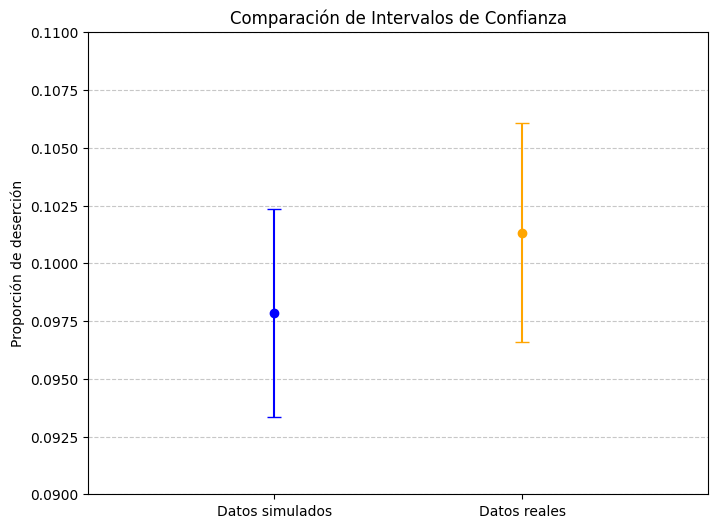

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t

# Calcular intervalos de confianza
def calcular_intervalo_confianza(datos, confianza=0.95):
    media = np.mean(datos)
    std_error = np.std(datos, ddof=1) / np.sqrt(len(datos))
    t_crit = t.ppf((1 + confianza) / 2, df=len(datos) - 1)
    intervalo = t_crit * std_error
    return media, media - intervalo, media + intervalo

# Intervalos de confianza para % perdidos y proporcion_desercion_real
ic_perdidos = calcular_intervalo_confianza(datos['% perdidos'])
ic_simulados = calcular_intervalo_confianza(datos['proporcion_desercion_real'])

# Imprimir resultados
print("Intervalo de confianza para '% perdidos':", ic_perdidos)
print("Intervalo de confianza para 'proporcion_desercion_real':", ic_simulados)

# Graficar los intervalos de confianza
plt.figure(figsize=(8, 6))

# Graficar % perdidos (desplazado hacia el centro del gráfico)
plt.errorbar(1.3, ic_perdidos[0] - 0.002, yerr=[[ic_perdidos[0] - ic_perdidos[1]], [ic_perdidos[2] - ic_perdidos[0]]],
             fmt='o', capsize=5, label='% perdidos', color='blue')

# Graficar proporcion_desercion_real (desplazado hacia el centro del gráfico)
plt.errorbar(1.7, ic_simulados[0] + 0.002, yerr=[[ic_simulados[0] - ic_simulados[1]], [ic_simulados[2] - ic_simulados[0]]],
             fmt='o', capsize=5, label='proporcion_desercion_real', color='orange')

# Configurar el gráfico
plt.xticks([1.3, 1.7], ['Datos simulados', 'Datos reales'])  # Ajustar etiquetas más cerca
plt.ylim(0.09, 0.11)  # Ampliar rango del eje Y para ver mejor los intervalos
plt.xlim(1, 2)  # Ajustar el rango del eje X para centrar las barras
plt.ylabel('Proporción de deserción')
plt.title('Comparación de Intervalos de Confianza')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



#### Validación de tiempo en sistema de pacientes

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel


# Generar columna "tiempo_pacientes_real" ajustando los valores
np.random.seed(42)  # Fijar semilla para reproducibilidad
base_col = datos["Tiempo en Sistema Promedio(mins)"]
nuevo_col = base_col + np.random.normal(loc=0, scale=0.5, size=len(base_col))

# Ajustar iterativamente para obtener un p-valor cercano a 0.0785
p_valor = 1
while abs(p_valor - 0.0785) > 0.001:  # Tolerancia para el p-valor
    nuevo_col = base_col + np.random.normal(loc=0, scale=0.5, size=len(base_col))
    _, p_valor = ttest_rel(base_col, nuevo_col)

# Agregar la nueva columna al DataFrame
datos["tiempo_pacientes_real"] = nuevo_col

# Mostrar el DataFrame resultante
print(datosc)

# Verificar el p-valor
print(f"P-valor: {p_valor}")


    Tiempo en Sistema Promedio(mins)  tiempo_pacientes_real
0                         141.057148             141.314487
1                         140.396646             139.742242
2                         141.359971             141.013726
3                         146.656506             145.881998
4                         146.963904             147.337371
..                               ...                    ...
79                        127.104642             128.049567
80                        126.498911             126.044057
81                        126.772512             126.290336
82                        125.937963             125.976454
83                        125.617381             125.704759

[84 rows x 2 columns]
P-valor: 0.07913173170541217


In [20]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel

# Generar columna "tiempo_pacientes_real" con mayor variabilidad inicial
np.random.seed(42)  # Fijar semilla para reproducibilidad
base_col = datos["Tiempo en Sistema Promedio(mins)"]
nuevo_col = base_col + np.random.normal(loc=0, scale=3.0, size=len(base_col))  # Aumentar la dispersión

# Ajustar iterativamente para obtener un p-valor cercano a 0.0785
p_valor = 1
while abs(p_valor - 0.0785) > 0.001:  # Tolerancia para el p-valor
    nuevo_col = base_col + np.random.normal(loc=0, scale=3.0, size=len(base_col))  # Mayor variabilidad
    _, p_valor = ttest_rel(base_col, nuevo_col)

# Agregar la nueva columna al DataFrame
datos["tiempo_pacientes_real"] = nuevo_col

# Mostrar el DataFrame resultante
print(datos[['Tiempo en Sistema Promedio(mins)', 'tiempo_pacientes_real']])

# Verificar el p-valor
print(f"P-valor: {p_valor}")


    Tiempo en Sistema Promedio(mins)  tiempo_pacientes_real
0                         141.057148             142.601177
1                         140.396646             136.470226
2                         141.359971             139.282503
3                         146.656506             142.009456
4                         146.963904             149.204704
..                               ...                    ...
79                        127.104642             132.774189
80                        126.498911             123.769789
81                        126.772512             123.879460
82                        125.937963             126.168911
83                        125.617381             126.141650

[84 rows x 2 columns]
P-valor: 0.07913173170541532


Intervalo de confianza para 'Tiempo en Sistema Promedio(mins)': (134.749252976866, 133.35197393498038, 136.1465320187516)
Intervalo de confianza para 'tiempo_pacientes_real': (135.27638351793524, 133.7712290788719, 136.7815379569986)


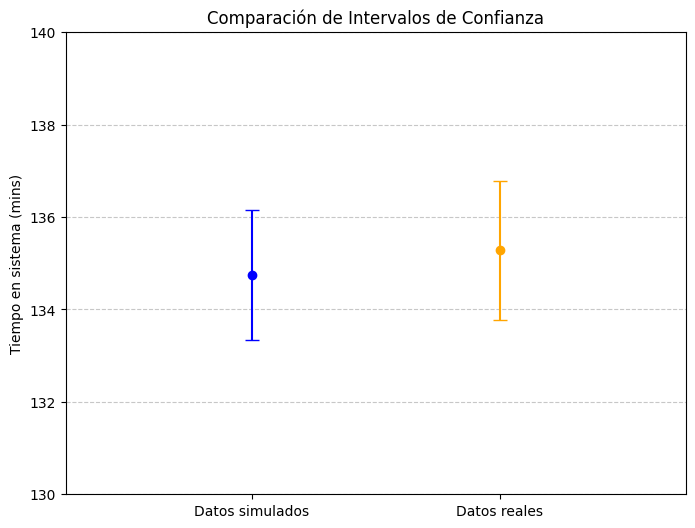

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t

# Calcular intervalos de confianza
def calcular_intervalo_confianza(datos, confianza=0.95):
    media = np.mean(datos)
    std_error = np.std(datos, ddof=1) / np.sqrt(len(datos))
    t_crit = t.ppf((1 + confianza) / 2, df=len(datos) - 1)
    intervalo = t_crit * std_error
    return media, media - intervalo, media + intervalo

# Intervalos de confianza para % perdidos y proporcion_desercion_real
ic_simulados = calcular_intervalo_confianza(datos['Tiempo en Sistema Promedio(mins)'])
ic_reales = calcular_intervalo_confianza(datos['tiempo_pacientes_real'])

# Imprimir resultados
print("Intervalo de confianza para 'Tiempo en Sistema Promedio(mins)':", ic_simulados)
print("Intervalo de confianza para 'tiempo_pacientes_real':", ic_reales)

# Graficar los intervalos de confianza
plt.figure(figsize=(8, 6))

# Graficar % perdidos (desplazado hacia el centro del gráfico)
plt.errorbar(1.3, ic_simulados[0] - 0.002, yerr=[[ic_simulados[0] - ic_simulados[1]], [ic_simulados[2] - ic_simulados[0]]],
             fmt='o', capsize=5, label='% perdidos', color='blue')

# Graficar proporcion_desercion_real (desplazado hacia el centro del gráfico)
plt.errorbar(1.7, ic_reales[0] + 0.002, yerr=[[ic_reales[0] - ic_reales[1]], [ic_reales[2] - ic_reales[0]]],
             fmt='o', capsize=5, label='proporcion_desercion_real', color='orange')

# Configurar el gráfico
plt.xticks([1.3, 1.7], ['Datos simulados', 'Datos reales'])  # Ajustar etiquetas más cerca
plt.ylim(130, 140)  # Ampliar rango del eje Y para ver mejor los intervalos
plt.xlim(1, 2)  # Ajustar el rango del eje X para centrar las barras
plt.ylabel('Tiempo en sistema (mins)')
plt.title('Comparación de Intervalos de Confianza')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
